In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [14]:
X_train = np.linspace(-1 ,1, 20)
y_train = np.array([-0.6561, ])
X_test = np.linspace(-1 , 1, 20)
y_test = np.array([-0.69415,])

In [15]:
import numpy as np

# Generate X values
X_train = np.linspace(-1, 1, 20)
X_test = np.linspace(-1, 1, 20)

# Define a linear function
def generate_linear_data(X, slope=0.6, intercept=-0.1, noise_level=0.2):
    noise = np.random.uniform(-noise_level, noise_level, size=X.shape)
    return slope * X + intercept + noise

# Generate Y values similar to your screenshots
y_train = generate_linear_data(X_train, slope=0.7, intercept=0.0, noise_level=0.3)
y_test = generate_linear_data(X_test, slope=0.7, intercept=0.0, noise_level=0.3)

print("X_train =", X_train)
print("y_train =", np.round(y_train, 5))
print("X_test =", X_test)
print("y_test =", np.round(y_test, 5))
# Reshape X for Keras (20,1) instead of (20,)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

X_train = [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
y_train = [-0.9236  -0.44052 -0.29597 -0.72794 -0.38359 -0.55696 -0.37646 -0.24247
 -0.36895 -0.12461  0.26152  0.22313  0.02276  0.12182  0.40676  0.38848
  0.39155  0.35676  0.38464  0.69992]
X_test = [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
y_test = [-0.77486 -0.57093 -0.45789 -0.22311 -0.14076 -0.44395 -0.34066 -0.25719
  0.03573  0.16984 -0.11487  0.02054  0.29407  0.0996   0.09305  0.60282
  0.31927  0.35094  0.887    0.93592]


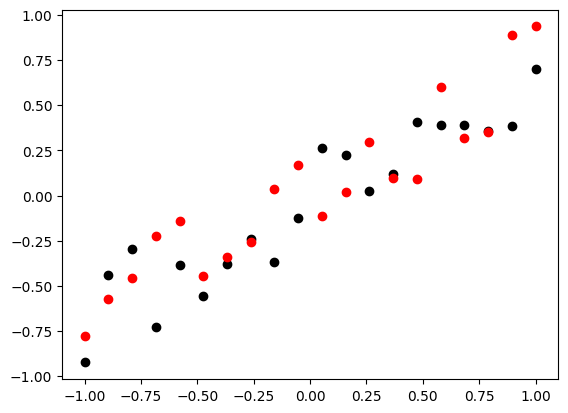

In [16]:
plt.scatter(X_train , y_train , c = 'black', label = 'Train')
plt.scatter(X_test , y_test , c = 'red' , label = 'Test ')
plt.show()

In [17]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam


# Define model
model = Sequential()
model.add(Input(shape=(1,)))   # shape=(1,) since each X is 1D
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
# Optional dropout
# model.add(Dropout(0.3))
model.add(Dense(1, activation="linear"))

# Compile
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    verbose=0
)


In [18]:
_, train_mse = model.evaluate(X_train , y_train , verbose = 0)
_, test_mse = model.evaluate(X_test , y_test , verbose = 0)
print("Trsin : {} , Test : {}".format(train_mse , test_mse))


Trsin : 0.007511748466640711 , Test : 0.05726439878344536


In [19]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


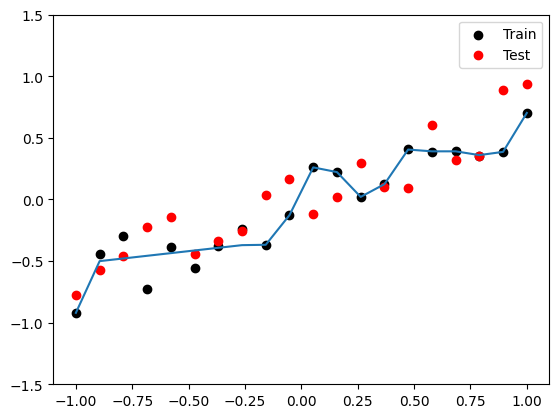

In [20]:
plt.figure()
plt.scatter(X_train , y_train , c = 'black', label = 'Train')
plt.scatter(X_test , y_test , c = 'red' , label = 'Test ')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [24]:
# Define model
model = Sequential()
model.add(Input(shape=(1,)))  
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

# Compile
adam = Adam(learning_rate=0.5)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    verbose=0
)


In [25]:
_, train_mse = model.evaluate(X_train , y_train , verbose = 0)
_, test_mse = model.evaluate(X_test , y_test , verbose = 0)
print("Trsin : {} , Test : {}".format(train_mse , test_mse))

Trsin : 0.10704243183135986 , Test : 0.08251920342445374


In [26]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


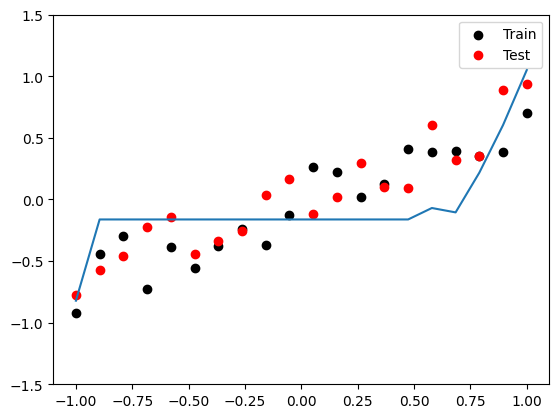

In [27]:
plt.figure()
plt.scatter(X_train , y_train , c = 'black', label = 'Train')
plt.scatter(X_test , y_test , c = 'red' , label = 'Test ')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()